In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


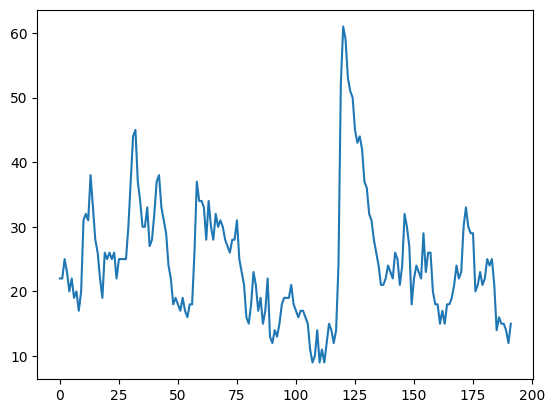

In [25]:
# (1) 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화 하세요.
df = pd.read_csv("PM10_seoul.csv")
plt.plot(range(len(df)), df["PM-10"])
plt.show()

In [26]:
# (2) 시간대별 평균 미세먼지 농도를 계산하세요. 즉  t시(t=1,2,3,4,...,24)
df["time"] = df["date"].str.split(":", expand = True).iloc[:,1]
df.groupby("time")["PM-10"].mean()

time
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64

In [27]:
# (3) 시점 t의 미세먼지 농도를 시점 t-1,t-2,t-3,t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요. 
# 예를들어, 8일 24시의 미세먼지 농도를 8일 20-23시의 농도를 예측할 수 있도록 구성합니다.

In [28]:
for k in range(1,5):
    df[str(k)] = df["PM-10"].shift(-k)

df.dropna(inplace=True)
df = df.drop(["date","time"], axis=1)
df

,PM-10,1,2,3,4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
2,25.0,23.0,20.0,22.0,19.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0
...,...,...,...,...,...
183,25.0,21.0,14.0,16.0,15.0
184,21.0,14.0,16.0,15.0,15.0
185,14.0,16.0,15.0,15.0,14.0
186,16.0,15.0,15.0,14.0,12.0


In [31]:
# (4)PM-10칼럼을 기준으로 특징과 라벨을 분리하여 학습한다.
X = df.drop("PM-10", axis=1)
y = df["PM-10"]
model = LinearRegression().fit(X,y)

In [32]:
df.head()

,PM-10,1,2,3,4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
2,25.0,23.0,20.0,22.0,19.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0


In [36]:
df1 = df.drop(2,axis=0)

In [37]:
df1.head()

,PM-10,1,2,3,4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0
5,22.0,19.0,20.0,17.0,20.0


In [40]:
df1.drop("1", axis=1,inplace= True)

In [41]:
df1.head()

,PM-10,2,3,4
0,22.0,25.0,23.0,20.0
1,22.0,23.0,20.0,22.0
3,23.0,22.0,19.0,20.0
4,20.0,19.0,20.0,17.0
5,22.0,20.0,17.0,20.0
